# Feature_engineering_polynomial_regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import zscore_normalize_features, run_gradient_descent_feng
np.set_printoptions(precision = 2)

Iteration         0, Cost: 1.65756e+03
Iteration       100, Cost: 6.94549e+02
Iteration       200, Cost: 5.88475e+02
Iteration       300, Cost: 5.26414e+02
Iteration       400, Cost: 4.90103e+02
Iteration       500, Cost: 4.68858e+02
Iteration       600, Cost: 4.56428e+02
Iteration       700, Cost: 4.49155e+02
Iteration       800, Cost: 4.44900e+02
Iteration       900, Cost: 4.42411e+02
w,b found by gradient descent: w: [18.7], b: -52.0834


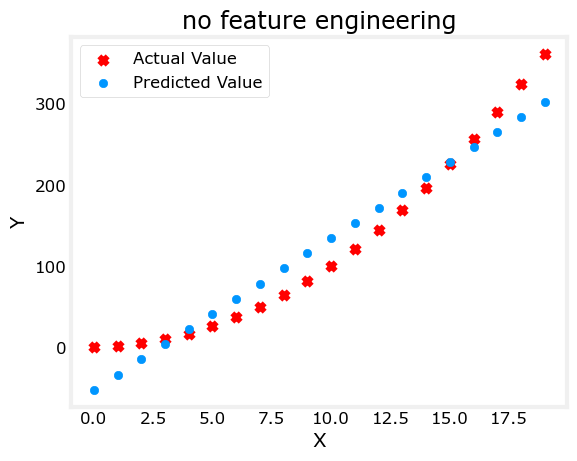

In [5]:
#create target data
#for the polynomial data y = x^2 + 1
x = np.arange(0,20,1)
y = 1 + x**2

X = x.reshape(-1, 1)

model_w, model_b = run_gradient_descent_feng(X, y, iterations = 1000, alpha = 1e-2)

plt.scatter(x, y, marker = 'x', c= 'r', label = "Actual Value")
plt.title("no feature engineering")

plt.scatter(x, X@model_w + model_b, label = 'Predicted Value')

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()



In [6]:
#lets add feature engineering with x0^2 insted of x
#the equation will look like
#y = w0x0^2 + b
#create target data
x = np.arange(0, 20, 1)
y = 1 + x**2

#enginner features
X = X**2


In [ ]:
X = X.reshape(-1, 1)
model_w, model_b = run_gradient_descent_feng(X, y, iterations = 10000, alpha = 1e-5)

plt.scatter(x, y, marker = 'x', c = 'r', label = "Actual value")
plt.title("Added x**2 features")
plt.plot(x, np.dot(X))